In [ ]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Generate 200 rows of data
rows = 200

# Date range
dates = pd.date_range(start="2025-01-01", periods=60).tolist()

# Sample data pools
products = ["Laptop", "Mobile Phone", "Tablet", "Headphones", "Smartwatch",
            "T-shirt", "Shoes", "Shirt", "Jeans", "Jacket",
            "Refrigerator", "Washing Machine", "Microwave", "Coffee Maker", "Mixer",
            "Sofa", "Chair", "Table", "Bed", "Cupboard"]

categories = {
    "Laptop": "Electronics", "Mobile Phone": "Electronics", "Tablet": "Electronics",
    "Headphones": "Electronics", "Smartwatch": "Electronics",
    "T-shirt": "Apparel", "Shoes": "Apparel", "Shirt": "Apparel",
    "Jeans": "Apparel", "Jacket": "Apparel",
    "Refrigerator": "Home Appliances", "Washing Machine": "Home Appliances",
    "Microwave": "Home Appliances", "Coffee Maker": "Home Appliances", "Mixer": "Home Appliances",
    "Sofa": "Furniture", "Chair": "Furniture", "Table": "Furniture",
    "Bed": "Furniture", "Cupboard": "Furniture"
}

regions = ["Bangalore", "Mumbai", "Delhi", "Hyderabad", "Chennai", "Pune", "Kolkata"]
payment_modes = ["Credit Card", "Debit Card", "UPI", "Cash"]

# Generate dataset
data = []
for _ in range(rows):
    product = random.choice(products)
    category = categories[product]
    quantity = random.randint(1, 10)
    unit_price = random.randint(500, 50000)  # varied price range
    revenue = quantity * unit_price
    row = {
        "Date": random.choice(dates),
        "Product": product,
        "Category": category,
        "Quantity": quantity,
        "Unit Price": unit_price,
        "Revenue": revenue,
        "Region": random.choice(regions),
        "Payment Mode": random.choice(payment_modes)
    }
    data.append(row)

# Create DataFrame
df_big = pd.DataFrame(data)

# Save to CSV
df_big.to_csv("sales_data_big.csv", index=False)

print("✅ Dataset with", rows, "rows created as sales_data_big.csv")
df_big.head()


✅ Dataset with 200 rows created as sales_data_big.csv


,Date,Product,Category,Quantity,Unit Price,Revenue,Region,Payment Mode
0,2025-01-27,Coffee Maker,Home Appliances,3,17278,51834,Bangalore,Debit Card
1,2025-01-06,Sofa,Furniture,7,31922,223454,Hyderabad,Credit Card
2,2025-02-03,Chair,Furniture,3,43301,129903,Hyderabad,Cash
3,2025-01-15,Table,Furniture,6,48626,291756,Bangalore,Cash
4,2025-02-18,Sofa,Furniture,6,22267,133602,Hyderabad,Credit Card


In [1]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_big.csv to sales_data_big.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sales_data_big.csv")


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

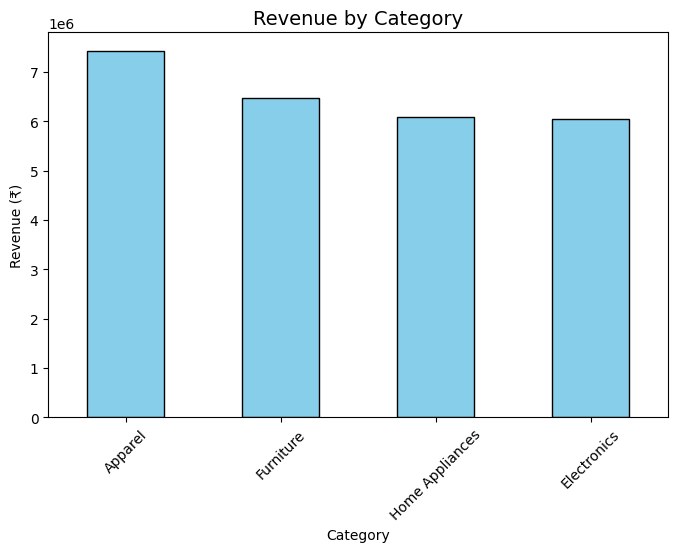

In [5]:
category_sales = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
category_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Revenue by Category", fontsize=14)
plt.ylabel("Revenue (₹)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

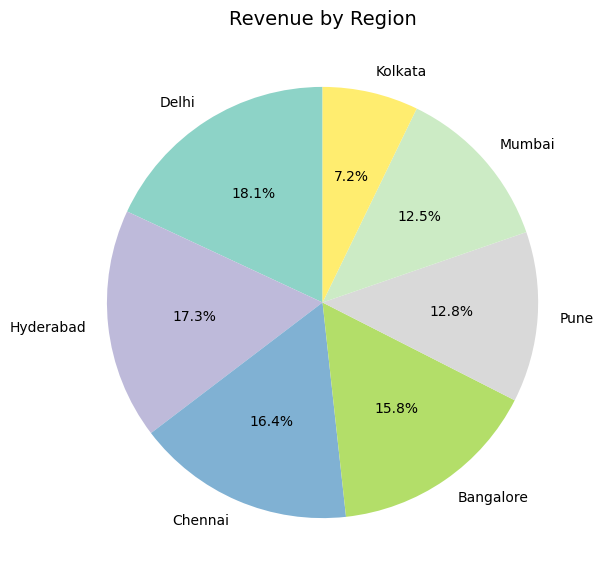

In [6]:
region_sales = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(7,7))
region_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="Set3")
plt.title("Revenue by Region", fontsize=14)
plt.ylabel("")
plt.show()

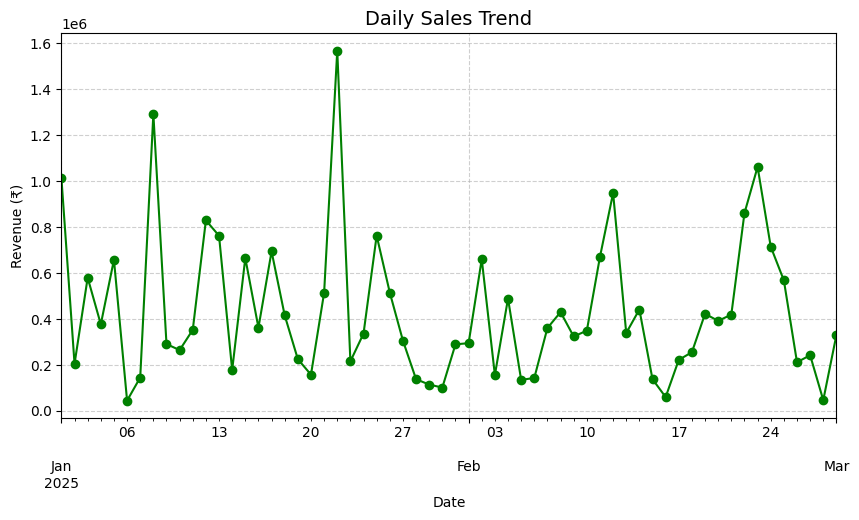

In [7]:
daily_sales = df.groupby("Date")["Revenue"].sum()
plt.figure(figsize=(10,5))
daily_sales.plot(kind="line", marker="o", color="green")
plt.title("Daily Sales Trend", fontsize=14)
plt.ylabel("Revenue (₹)")
plt.xlabel("Date")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

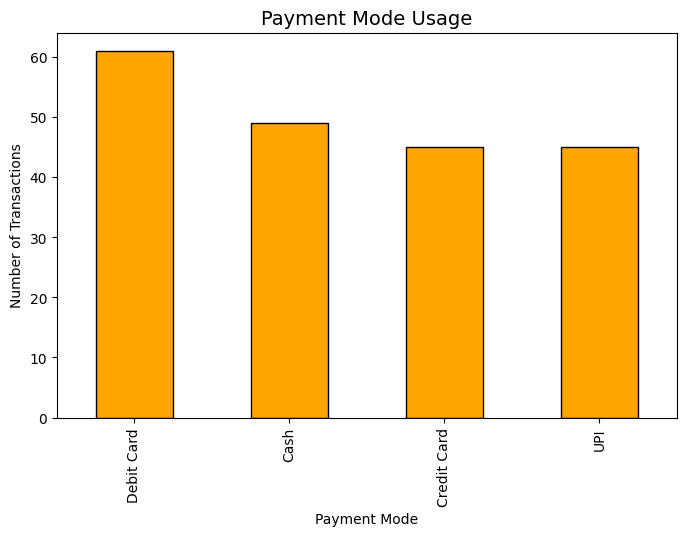

In [8]:
payment_mode = df["Payment Mode"].value_counts()
plt.figure(figsize=(8,5))
payment_mode.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Payment Mode Usage", fontsize=14)
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Mode")
plt.show()

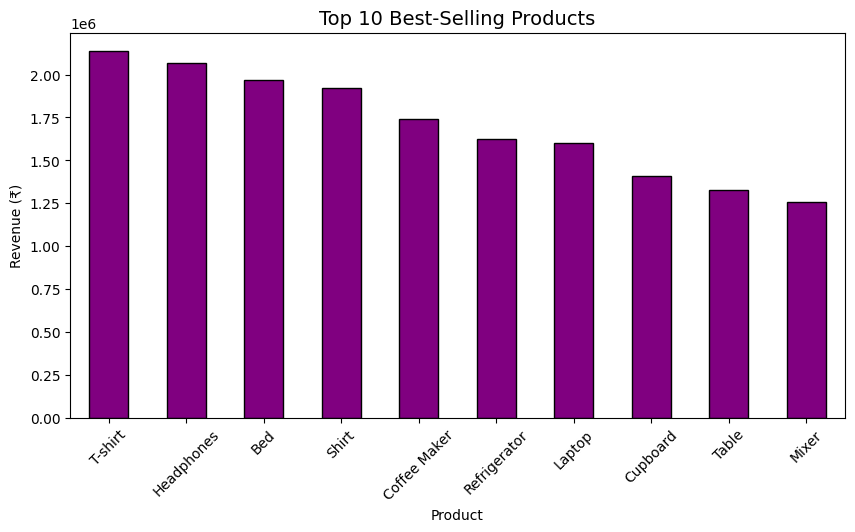

In [9]:
product_sales = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
product_sales.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()